In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error,r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import scipy.stats as stats
sns.set_style('darkgrid')



In [32]:
df=pd.read_csv('./datasets/Student_Performance.csv')
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [33]:
df.shape

(10000, 6)

the describe of the data to see if there are outliers or not or is there any wierd tendances in the data

In [34]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [40]:
#checking for nulls and duplicates
print(f"Number of nulls:{df.isnull().sum().sum()}")
print(f"Number of duplicates:{df.duplicated().sum()}")
df=df.drop_duplicates()
print(f"Number of duplicates after dropping:{df.duplicated().sum()}")

Number of nulls:0
Number of duplicates:0
Number of duplicates after dropping:0


LABEL ENCODING :converting into numeric data

In [42]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#Encode categorical column as linear regression needs the features to be 
le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])
#label encoder gives and index to each unique category it feature
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


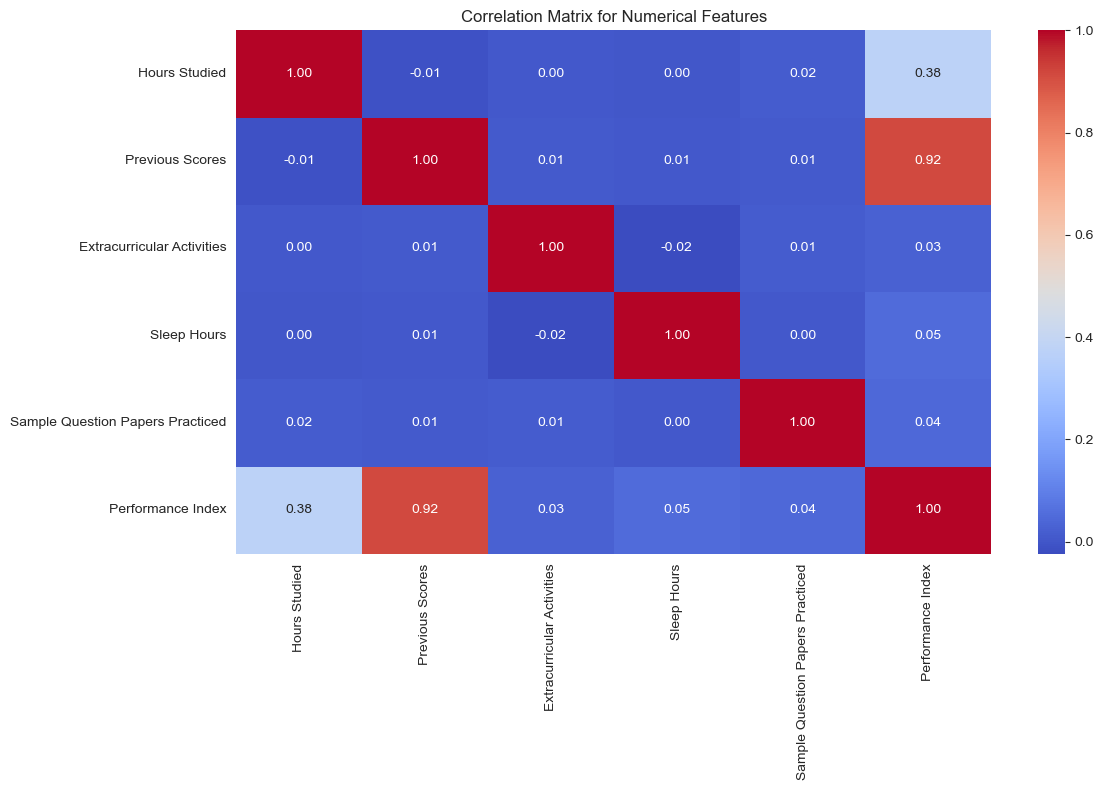

In [44]:
#correlation matrix to see the correlations and dependancies between features 
correlation_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()

In [59]:
#we should drop sleep hours and samples Question papers and Extracurricular Activities
df=df.drop(columns=['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'])


In [60]:
df.head(10)

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
5,3,78,61.0
6,7,73,63.0
7,8,45,42.0
8,5,77,61.0
9,4,89,69.0


TRAIN,TEST AND SPLIT OF DATA

standard scalar is used to make all in same scale not in ones ,tens.

In [61]:
from sklearn.model_selection import train_test_split
y=df['Performance Index']
X=df.drop(['Performance Index'],axis=1)
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#split the data

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.1,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8885, 2) (988, 2) (8885,) (988,)


traning data,testing data for x,dependent variables for training ,dependent variable for test data

MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

#single feature 
feature ='Previous Scores'
X_single_train=X_train[[feature]]
X_single_test=X_test[[feature]]

lr_single =LinearRegression()#here we call the model
lr_single.fit(X_single_train,y_train)#here we are fitting and training the model

y_pred_single=lr_single.predict(X_single_test) #here we predit 



PLOT

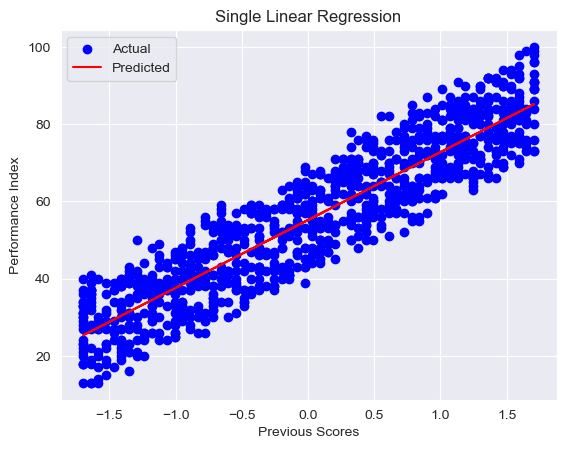

In [67]:
plt.scatter(X_single_test,y_test,color='blue',label='Actual')
plt.plot(X_single_test,y_pred_single,color='red',label='Predicted')
plt.title('Single Linear Regression')
plt.xlabel(feature)
plt.ylabel('Performance Index')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
#Metrics
r2_single=r2_score(y_test,y_pred_single)
mse_single= mean_squared_error(y_test,y_pred_single)
print(f"Single Linear Regression - R2 score:{r2_single:.4f}")
print(f"Single Linear Regression -Mean Squared Error:{mse_single:.4f}")



Single Linear Regression - R2 score:0.8390
Single Linear Regression -Mean Squared Error:59.9961


USING MULTI LINEAR REGRESSION

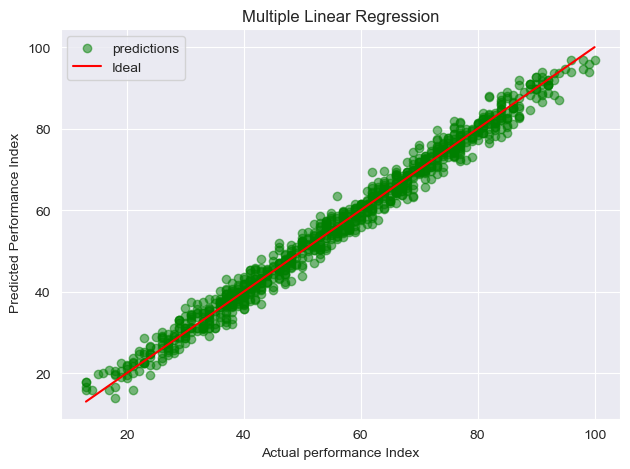

Multiple Linear Regression - R2 score:0.9851
Multiple Linear Regression -Mean Squared Error:5.5553


In [ ]:
lr_multi =LinearRegression()#here we call the model
lr_multi.fit(X_train,y_train)#here we are fitting and training the model

y_pred_multi=lr_multi.predict(X_test)

#plot
plt.scatter(y_test,y_pred_multi,alpha=0.5,color='green',label='predictions')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red',label='Ideal')
plt.title('Multiple Linear Regression')
plt.xlabel('Actual performance Index')
plt.ylabel(' Predicted Performance Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
#matrics
r2_multi=r2_score(y_test,y_pred_multi)
mse_multi= mean_squared_error(y_test,y_pred_multi)
print(f"Multiple Linear Regression - R2 score:{r2_multi:.4f}")
print(f"Multiple Linear Regression -Mean Squared Error:{mse_multi:.4f}")

In [82]:
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_multi})
print("\nActual vs Predicted Performance Index:")
print(comparison_df.head(20))  # Show first 20 rows


Actual vs Predicted Performance Index:
    Actual  Predicted
0     47.0  46.840198
1     76.0  81.896941
2     62.0  61.720770
3     23.0  22.588544
4     76.0  73.343486
5     83.0  83.733438
6     60.0  61.519526
7     51.0  50.500544
8     38.0  38.689232
9     58.0  56.223927
10    48.0  48.274206
11    62.0  64.161001
12    54.0  56.626416
13    47.0  42.349578
14    55.0  59.280540
15    54.0  56.827661
16    86.0  86.173668
17    31.0  28.299280
18    35.0  35.217482
19    38.0  40.726973


C:\Users\HP\AppData\Local\Temp\ipykernel_12824\4082573364.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient',y='Feature',data=coefficients,palette='pastel')


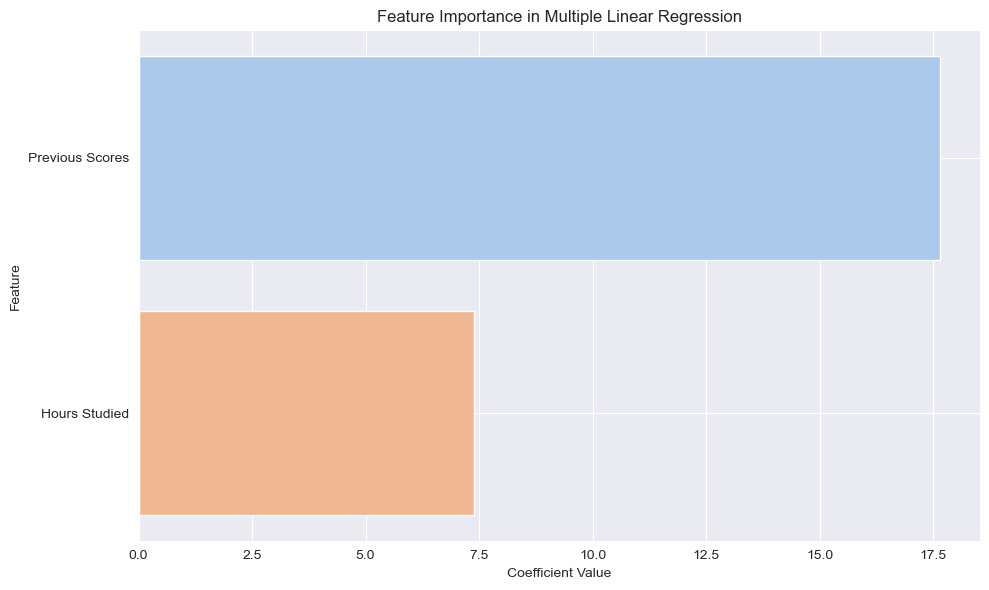

In [81]:
features=X_train.columns
coefficients=pd.DataFrame({
    'Feature':features,
    'Coefficient':lr_multi.coef_
}).sort_values(by='Coefficient',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient',y='Feature',data=coefficients,palette='pastel')
plt.title("Feature Importance in Multiple Linear Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()